#**CSE164 Code Example - Image Filtering**
This notebook provides illustrative code examples to basic image filtering techniques using the OpenCV computer vision library and some standard data analysis libraries in Python.

You may find some useful information about google colab and opencv here: [Colab](https://colab.research.google.com/notebooks/welcome.ipynb) and [OpenCV](https://opencv.org/)

> credit to: https://github.com/xn2333/OpenCV, https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html, and https://github.com/MeteHanC/Python-Median-Filter/blob/master/MedianFilter.py

##Step1: Import the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

##Step2: Read Image from Urls

> In this step we will read an image from url, and display it using Matplotlib.

image shape: (350, 269, 3)


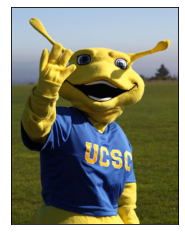

In [ ]:
url = "https://news.ucsc.edu/2011/06/images/slugcloseup350.jpg"  

image = io.imread(url)
print(f'image shape: {image.shape}')
plt.xticks([]), plt.yticks([])
plt.imshow(image)

##Step3: Pixel Transformation

> In this step we apply three simple function to each pixel in the image: Darkening, Lighting, and Inverting.

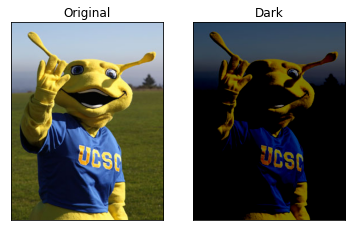

In [ ]:
# cast data type to signed int to avoid underflow
darken_image = np.clip(image.astype(int) - np.ones_like(image, dtype=int) * 128, 0, None).astype(np.uint8)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(darken_image),plt.title('Dark')
plt.xticks([]), plt.yticks([])
plt.show()

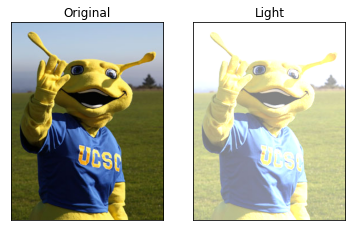

In [ ]:
# cast data type to signed int to avoid overflow
lighten_image = np.clip(image.astype(int) + np.ones_like(image, dtype=int) * 128, None, 255).astype(np.uint8)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(lighten_image),plt.title('Light')
plt.xticks([]), plt.yticks([])
plt.show()

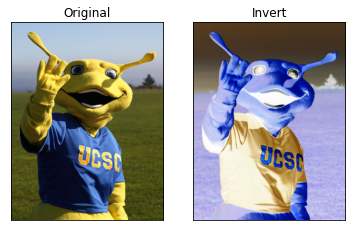

In [ ]:
invert_image = (255 - image).astype(np.uint8)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(invert_image),plt.title('Invert')
plt.xticks([]), plt.yticks([])
plt.show()

##Step4: Average Filtering

> Average Filtering is done by convolving an image with a normalized box filter, which simply takes the average of all the pixels under the kernel area and replaces the central element.



> Add gaussian noise to the image, and then apply average filtering to the noisy image.

In [ ]:
row, column, channel = image.shape
mean = 0
var = 9
sigma = var**0.5
gauss_noise = np.random.normal(mean,sigma, (row,column,channel))
gauss_noise = gauss_noise.reshape(row,column,channel)
gauss_noisy_image = (image + gauss_noise).astype(np.uint8)

In [ ]:
def average_filter(img, mask=3):
  # set image borders
  bd = int(mask / 2)
  # copy image size
  average_img = np.zeros_like(img)
  for i in range(bd, img.shape[0] - bd):
    for j in range(bd, img.shape[1] - bd):
      window = img[i - bd : i + bd + 1, j - bd : j + bd + 1, :]
      average_img[i, j, :] = (np.sum(window, axis=(0,1)) / (window.shape[0] * window.shape[1])).astype(np.uint8)
  return average_img

In [ ]:
average_image = average_filter(gauss_noisy_image, mask=5)

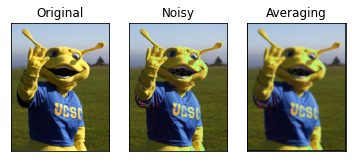

In [ ]:
plt.subplot(131),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gauss_noisy_image),plt.title('Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(average_image),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

> Alternatively, OpenCV provides a function [cv.filter2D()](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) to convolve custom a kernel with an image. Check the docs for more details.

In [ ]:
average_kernel = np.ones((5,5),np.float32) / 25 # average filtering kernel
average_image = cv.filter2D(gauss_noisy_image,-1,average_kernel)

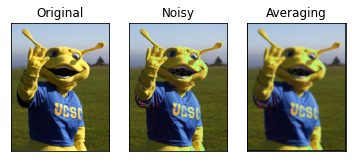

In [ ]:
plt.subplot(131),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gauss_noisy_image),plt.title('Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(average_image),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

##Step5: Max Filtering

> The maximum filter is defined as the maximum of all pixels within a local region of an image.


In [ ]:
def max_filter(img, mask=3):
  # set image borders
  bd = int(mask / 2)
  # copy image size
  max_img = np.zeros_like(img)
  for i in range(bd, img.shape[0] - bd):
    for j in range(bd, img.shape[1] - bd):
      window = img[i - bd : i + bd + 1, j - bd : j + bd + 1, :]
      max_img[i, j, :] = np.amax(window, axis=(0,1)).astype(np.uint8)
  return max_img

In [ ]:
max_image = max_filter(image, mask=3)

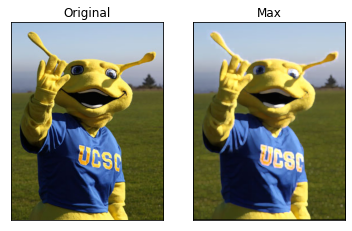

In [ ]:
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(max_image),plt.title('Max')
plt.xticks([]), plt.yticks([])
plt.show()